# Ridge Regression

Ridge Regression is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

Regularization` is a technique used in machine learning and statistics to prevent overfitting of models on training data. Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization to new, unseen data. Regularization helps to solve this problem by adding a penalty to the model's complexity.

Ridge regression, also known as Tikhonov regularization, is a type of linear regression that includes a regularization term. The key idea behind ridge regression is to find a new line that doesn't fit the training data as well as ordinary least squares regression, in order to achieve better generalization to new data. This is particularly useful when dealing with multicollinearity (independent variables are highly correlated) or when the number of predictors (features) exceeds the number of observations.

### Key Concept:
- **Regularization**: Ridge regression adds a penalty equal to the square of the magnitude of coefficients. This penalty term (squared L2 norm) shrinks the coefficients towards zero, but it doesn't make them exactly zero.

### Mathematical Representation:
The ridge regression modifies the least squares objective function by adding a penalty term:

$$ \text{Minimize } \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

where:
- $ y_i $ is the response value for the ith observation.
- $ x_{ij} $ is the value of the jth predictor for the ith observation.
- $ \beta_j $ is the regression coefficient for the jth predictor.
- $ \lambda $ is the tuning parameter that controls the strength of the penalty; $ \lambda \geq 0 $.


In this code, `alpha` is the regularization strength \( \lambda \). Adjusting `alpha` changes the strength of the regularization penalty. A larger `alpha` enforces stronger regularization (leading to smaller coefficients), and a smaller `alpha` tends towards a model similar to linear regression.

### Key Points:
- **Choosing Alpha**: Selecting the right value of `alpha` is crucial. It can be done using cross-validation techniques like `RidgeCV`.
- **Standardization**: It's often recommended to standardize the predictors before applying ridge regression.
- **Bias-Variance Tradeoff**: Ridge regression balances the bias-variance tradeoff in model training.



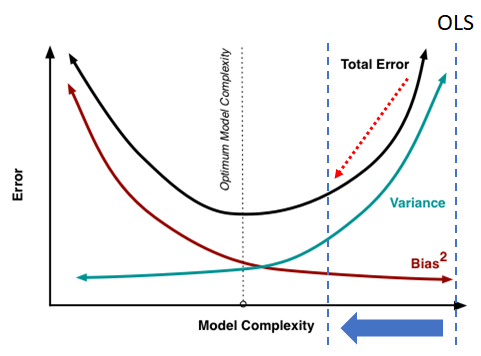

In [4]:
from sklearn.linear_model import Ridge
import numpy as np


In [7]:
X=np.array([[1,1],[1,2],[2,2],[2,3]])
y=np.dot(X,np.array([1,2]))+3
from sklearn.linear_model import Ridge
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# Target values
y = np.dot(X, np.array([1, 2])) + 3

# Ridge Regression Model
ridge_reg = Ridge(alpha=1.0)  # alpha is the equivalent of lambda in the formula
ridge_reg.fit(X, y)

# Coefficients
print("Coefficients:", ridge_reg.coef_)
# Intercept
print("Intercept:", ridge_reg.intercept_)

Coefficients: [0.8 1.4]
Intercept: 4.5


# Comparing Simple Linear Regression vs. Ridge Regression

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [14]:
df=sns.load_dataset('titanic')
columns_to_use = ['survived', 'pclass', 'sex', 'age', 'fare']
df = df[columns_to_use]

# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)

# Define feature and target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lasso Regression

Lasso Regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage here means that the data values are shrunk towards a central point, like the mean. The lasso technique encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

### Key Features of Lasso Regression:

1. **Regularization Term**: The key characteristic of Lasso Regression is that it adds an L1 penalty to the regression model, which is the absolute value of the magnitude of the coefficients. The cost function for Lasso regression is:

   $$ \text{Minimize } \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

   where $ \lambda $ is the regularization parameter.
2. **Feature Selection**: One of the advantages of lasso regression over ridge regression is that it can result in sparse models with few coefficients; some coefficients can become exactly zero and be eliminated from the model. This property is called automatic feature selection and is a form of embedded method.

3. **Parameter Tuning**: The strength of the L1 penalty is determined by a parameter, typically denoted as alpha or lambda. Selecting a good value for this parameter is crucial and is typically done using cross-validation.

4. **Bias-Variance Tradeoff**: Similar to ridge regression, lasso also manages the bias-variance tradeoff in model training. Increasing the regularization strength increases bias but decreases variance, potentially leading to better generalization on unseen data.
5. **Scaling**: Before applying lasso, it is recommended to scale/normalize the data as lasso is sensitive to the scale of input features.

### Implementation in Scikit-Learn:

Lasso regression can be implemented using the `Lasso` class from Scikit-Learn's `linear_model` module. Here's a basic example:

In [54]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
X,y=make_regression(n_samples=100, n_features=2, noise=0.1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lasso=Lasso(alpha=1)
ridge = Ridge(alpha=1.0)

In [57]:
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [58]:
y_predict_lasso=lasso.predict(X_test)
y_predict_ridge=ridge.predict(X_test)

In [59]:
print("MSE:", mean_squared_error(y_test, y_predict_lasso))
print("MSE:", mean_squared_error(y_test, y_predict_ridge))

MSE: 1.8310686428296126
MSE: 0.20340579159856542


In this example, alpha is the parameter that controls the amount of L1 regularization applied to the model. Fine-tuning alpha through techniques like cross-validation is a common practice to find the best model.

In [60]:
# Fine tune alpha value using cv
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Lasso regression object
lasso = Lasso()

In [61]:
# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.1)}

In [62]:
# Use grid search to find the best value for alpha
lasso_cv = GridSearchCV(lasso, param_grid, cv=10)

# Fit the model
lasso_cv.fit(X, y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])})

In [63]:
# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 1.0}
Best score is 0.9979727881486109


In [65]:
# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.1)}

# Use grid search to find the best value for alpha
ridge_cv = GridSearchCV(ridge, param_grid, cv=10)

# Fit the model
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 1.0}
Best score is 0.9998328442430262
